## Sentiment Analysis, Recommendation System, and Discounted Price Prediction on Amazon Sales ##

**Introduction**

Amazon is an American Tech Multi-National Company whose business interests include E-commerce, where they buy and store the inventory, and take care of everything from shipping and pricing to customer service and returns.

In this project, my goal is to extract the insights and learn how to build a simple recommendation system, sentiment analysis, and predict discounted price using a real-world Amazon sales dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [2]:
! KAGGLE_CONFIG_DIR=.kaggle kaggle datasets download -d karkavelrajaj/amazon-sales-dataset

amazon-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


**Extract File**

In [3]:
import zipfile
# Extract file
local_zip = 'amazon-sales-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('data')
zip_ref.close()

## Data Preprocessing ##

**Read Data to DataFrame Pandas**

In [2]:
df = pd.read_csv('data/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**About Dataset**

This dataset is having the data of 1K+ Amazon Product's Ratings and Reviews as per their details listed on the official website of Amazon

**Features**

• product_id - Product ID

• product_name - Name of the Product

• category - Category of the Product

• discounted_price - Discounted Price of the Product

• actual_price - Actual Price of the Product

• discount_percentage - Percentage of Discount for the Product

• rating - Rating of the Product

• rating_count - Number of people who voted for the Amazon rating

• about_product - Description about the Product

• user_id - ID of the user who wrote review for the Product

• user_name - Name of the user who wrote review for the Product

• review_id - ID of the user review

• review_title - Short review

• review_content - Long review

• img_link - Image Link of the Product

• product_link - Official Website Link of the Product

**Check for Inconsistent Data Type**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In the output above indicates that **discounted_price**, **actual_price**, **discount_percentage**, **rating_count**, **rating** must be numerical data types because their column contain a various number. Therefore, we have to convert these columns from categorical to numerical.

In [4]:
# Remove currency symbol (₹) and perentage (%), then convert into numeric data type
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

**Describe Data**

In [5]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353
std,6944.304394,10874.826864,21.635905,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


We can see that some points about the actual price

• Lowest Price: 39

• Quartil 25% (Q1): 800

• Median: 1650

• Quartil 75% (Q3): 4295

• Highest Price: 139.900


**Check for Missing Values**

In [6]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

On **rating_count** have 2 missing values and **ratings** have 1 missing value, so we can handle that with remove the rows that not contain any value.

In [7]:
df.dropna(subset = ["rating"], axis= 'rows' , inplace = True)
df.dropna(subset = ["rating_count"], axis= 'rows' , inplace = True)
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

**Creating New Columns for The Detail Analytics**

In [8]:
#Creating Categories for Rankings

rating_score = []

for score in df['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

#Creating Difference of Price Column between Actual Price and Discounted Price

df['difference_price'] = df['actual_price'] - df['discounted_price']

#Creating A new Column and Changing the Data Type

df['rating_score'] = rating_score

df['rating_score'] = df['rating_score'].astype('category')

#Reordered Categories

df['rating_score'] = df['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,difference_price,rating_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,700.0,Above Average
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,150.0,Above Average
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,1700.0,Average
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,370.0,Above Average
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,245.0,Above Average


Created a a Rating Category that consists of:

1. Score below 2.0 = Poor

2. Score range of 2.0 - 2.9 = Below Average

3. Score range of 3.0 - 3.9 = Average

4. Score Range of 4.0 - 4.9 = Above Average

5. Score of 5.0 = Excellent

In [9]:
df['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [10]:
# Define the maximum of product category 
max_categories = df['category'].str.split('|').apply(len).max()

# Split the value based on '|' symbol
split_columns = df['category'].str.split('|', expand=True, n=max_categories-1)

# Define new columns
split_columns.columns = [f'category_level_{i+1}' for i in range(max_categories)]

# Merge to origin dataframe
df = df.join(split_columns)

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,difference_price,rating_score,category_level_1,category_level_2,category_level_3,category_level_4,category_level_5,category_level_6,category_level_7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,700.0,Above Average,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,150.0,Above Average,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,1700.0,Average,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,370.0,Above Average,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,245.0,Above Average,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None


In [11]:
df['category_level_1'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [12]:
df['category_level_2'].unique()

array(['Accessories&Peripherals', 'NetworkingDevices',
       'HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology',
       'Mobiles&Accessories', 'Accessories',
       'Headphones,Earbuds&Accessories', 'ExternalDevices&DataStorage',
       'Microphones', 'GeneralPurposeBatteries&BatteryChargers',
       'OfficePaperProducts', 'CraftMaterials', 'Cameras&Photography',
       'OfficeElectronics', 'Printers,Inks&Accessories', 'Monitors',
       'Components', 'Electrical', 'Arts&Crafts', 'PowerAccessories',
       'Tablets', 'Laptops', 'Kitchen&HomeAppliances',
       'Heating,Cooling&AirQuality', 'Kitchen&Dining',
       'HomeStorage&Organization', 'CarAccessories',
       'HomeMedicalSupplies&Equipment'], dtype=object)

In [13]:
# Remove the unnecessary columns
df = df.drop(columns=['category_level_3', 'category_level_4', 'category_level_5', 'category_level_6', 'category_level_7'])
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,difference_price,rating_score,category_level_1,category_level_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,700.0,Above Average,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,150.0,Above Average,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,1700.0,Average,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,370.0,Above Average,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,245.0,Above Average,Computers&Accessories,Accessories&Peripherals


## Data Exploration ##

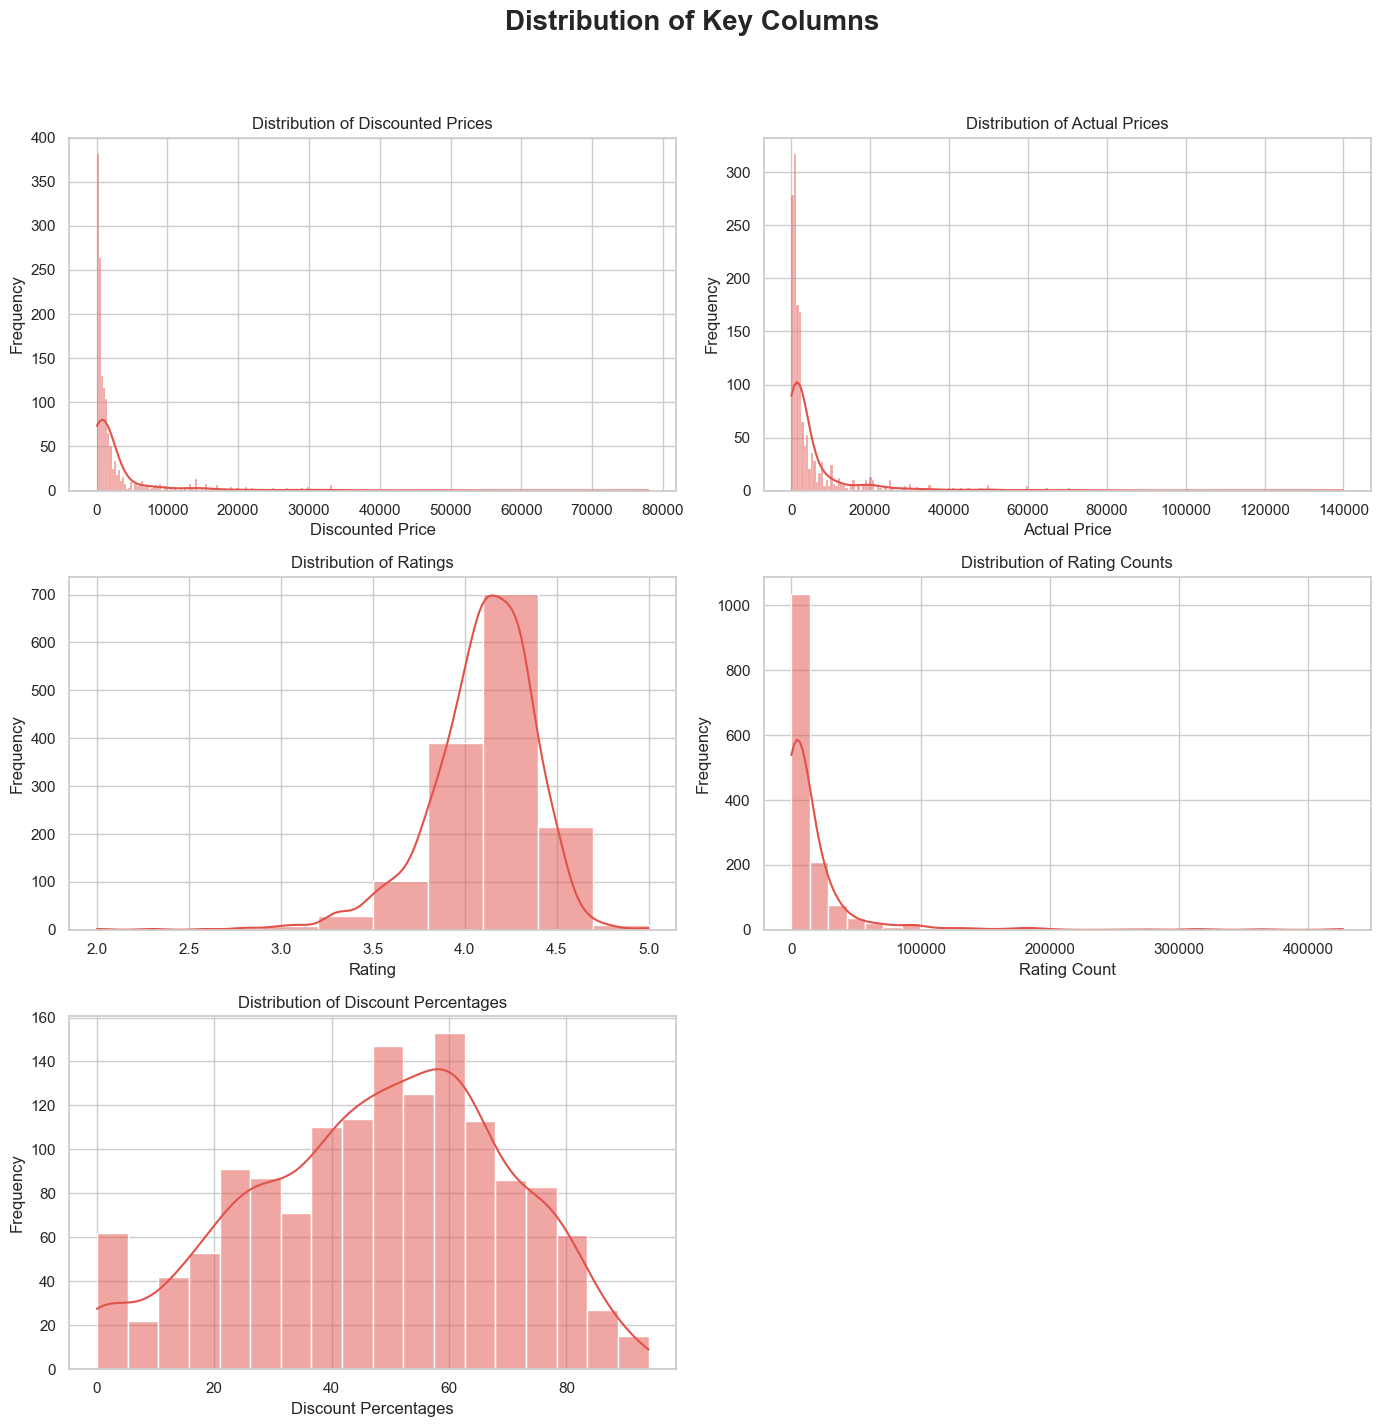

In [14]:
# Set up the figure and axes with an additional row
fig, axs = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle('Distribution of Key Columns', fontsize=20, fontweight='bold')

# Distribution of Discounted Prices
sns.histplot(df['discounted_price'].dropna(), kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Discounted Prices')
axs[0, 0].set_xlabel('Discounted Price')
axs[0, 0].set_ylabel('Frequency')

# Distribution of Actual Prices
sns.histplot(df['actual_price'].dropna(), kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actual Prices')
axs[0, 1].set_xlabel('Actual Price')
axs[0, 1].set_ylabel('Frequency')

# Distribution of Ratings
sns.histplot(df['rating'].dropna(), bins=10, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Ratings')
axs[1, 0].set_xlabel('Rating')
axs[1, 0].set_ylabel('Frequency')

# Distribution of Rating Counts
sns.histplot(df['rating_count'].dropna(), bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Rating Counts')
axs[1, 1].set_xlabel('Rating Count')
axs[1, 1].set_ylabel('Frequency')

# Distribution of the Discount Percentages
sns.histplot(df['discount_percentage'].dropna(), kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Discount Percentages')
axs[2, 0].set_xlabel('Discount Percentages')
axs[2, 0].set_ylabel('Frequency')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

• **Discounted Prices**, **Rating Count**, and **Actual Prices** graphs show the same distribution which is Right or Positvely Skewed.

• Most products on the dataset have **Ratings** at around 4.0 - 4.4

• Most products on the dataset have **discounts** at around 50% - 70%.

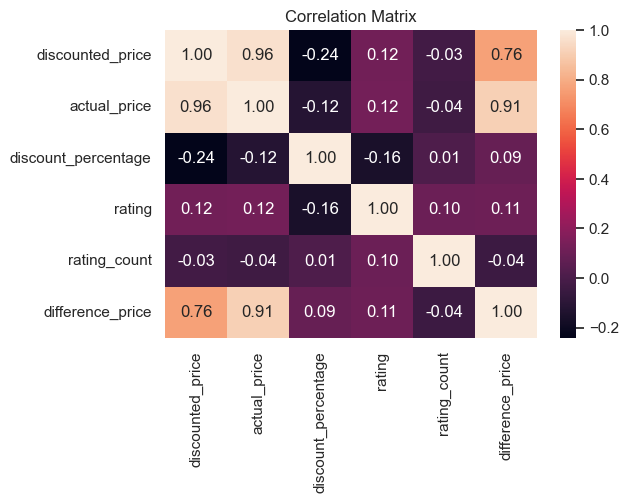

In [15]:
# Filter the categorical columns
df_corr = df.drop(['product_id','product_name', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
                   'review_content', 'img_link', 'product_link', 'rating_score', 'category_level_1',
                   'category_level_2'], axis=1)

# Define the correlation matrix
correlation_all = df_corr.corr()

# Showing the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_all, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows the pairwise correlations between different columns in your dataset. Correlation values range from -1 to 1, where:

• 1 indicates a perfect positive correlation.

• -1 indicates a perfect negative correlation.

• 0 indicates no correlation.

Strong Correlations:

• discounted_price and actual_price (0.96)

• actual_price and difference_price (0.91)

• discounted_price and difference_price (0.76)

Weak Correlations:

• discount_percentage with discounted_price (-0.24) and actual_price (-0.12)

• Other variables generally have weak correlations, suggesting minimal linear relationships.

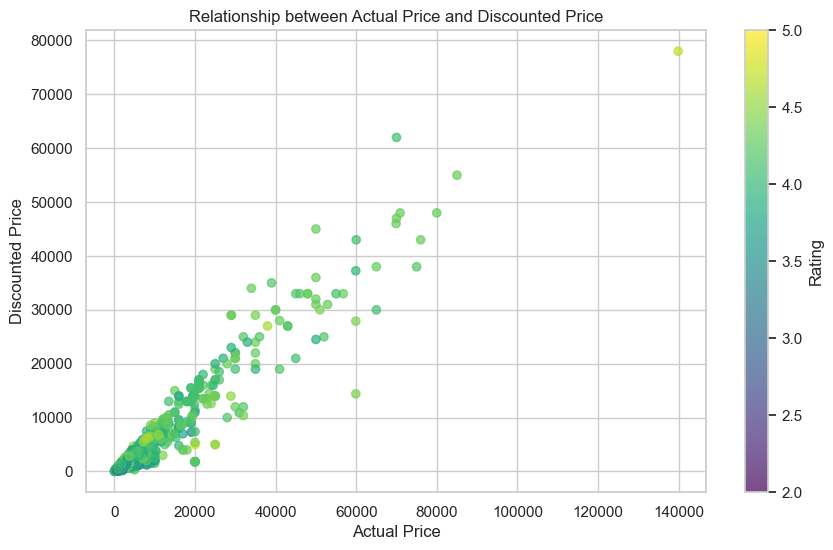

In [16]:
# Showing the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['discounted_price'], c=df['rating'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Rating')
plt.title('Relationship between Actual Price and Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.grid(True)
plt.show()

• There is a clear positive correlation between the actual price and the discounted price. This means that generally, products with a higher actual price tend to have a higher discounted price as well. This can be seen from the trend of data points forming a diagonal line from the bottom left to the top right.

• The rating, represented by the color, does not show a clear pattern in relation to the prices. Data points with various ratings are scattered throughout the plot, indicating that the rating does not have a strong correlation with either the actual price or the discounted price in this dataset.

• There are some outliers, particularly on the higher end of actual prices (> 100,000) and discounted prices (> 50,000). These outliers might represent premium products or services.

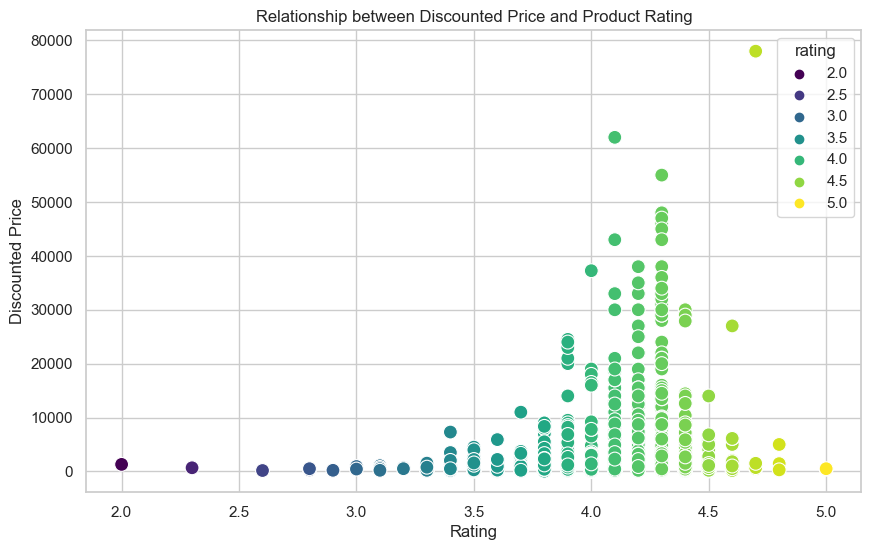

In [17]:
# Showing the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rating', y='discounted_price', hue='rating', palette='viridis', s=100)
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.title('Relationship between Discounted Price and Product Rating')
plt.show()

• There appears to be a clustering of products with higher ratings (4.0 and above) around lower to moderate discounted prices.

• As the rating increases, the discounted prices tend to be concentrated more in the lower to mid-range, with fewer products having high discounted prices.

• Products with ratings around 2.0 to 3.0 are sparse and generally have lower discounted prices.

• Products with ratings between 3.5 and 4.5 have a broader distribution of discounted prices, but the majority are still in the lower range.

• The highest discounted prices are associated with a few products that have ratings around 4.0.

• There are very few products with the highest rating (5.0) and these are primarily associated with lower discounted prices.

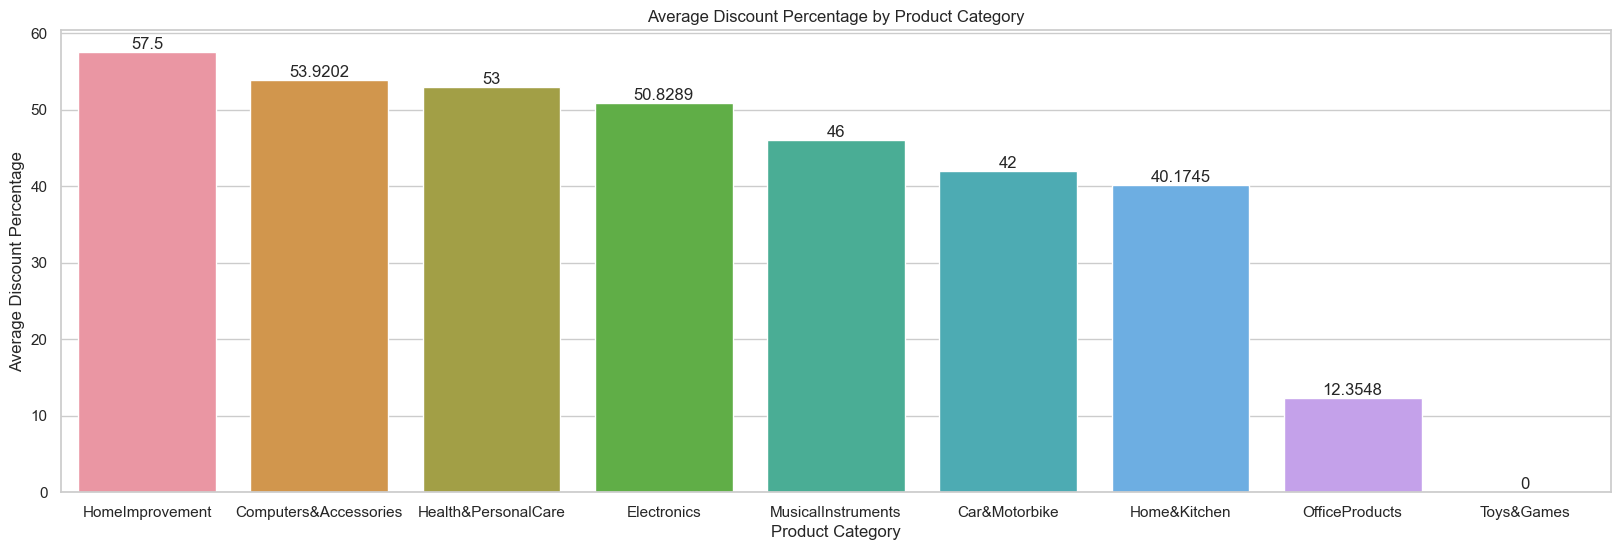

In [18]:
# Group based on product category and sum the average of discount precentage
average_discount = df.groupby('category_level_1')['discount_percentage'].mean().sort_values(ascending=False).reset_index()

# Plot histogram
plt.figure(figsize=(20, 6))
sns.barplot(x='category_level_1', y='discount_percentage', data=average_discount)
plt.title('Average Discount Percentage by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Discount Percentage')

# Add frequency label at bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)
    
plt.show()

• **Home Improvement**, **Computers & Accessories**, **Health & Personal Care**, and **Electronics** are the categories with the highest average discounts, suggesting these categories frequently offer significant discounts to attract customers.

• **Office Products** and **Toys & Games** have the lowest average discounts, which could indicate less promotional activity or a different pricing strategy for these categories.

In [19]:
#Main Category and Sub-Category

main_sub = df[['category_level_1', 'category_level_2', 'product_id']]

main_sub = main_sub.rename(columns={'category_level_1' :'Main Category', 'category_level_2' : 'Sub-Category', 'product_id':'Product ID'})

main_sub_piv = pd.pivot_table(main_sub, index=['Main Category', 'Sub-Category'], aggfunc='count')

main_sub_piv

Product ID
Main Category         Sub-Category                                       
Car&Motorbike         CarAccessories                                    1
Computers&Accessories Accessories&Peripherals                         379
                      Components                                        5
                      ExternalDevices&DataStorage                      18
                      Laptops                                           1
                      Monitors                                          2
                      NetworkingDevices                                34
                      Printers,Inks&Accessories                        11
                      Tablets                                           1
Electronics           Accessories                                      14
                      Cameras&Photography                              16
                      GeneralPurposeBatteries&BatteryChargers          14
                      Headphones,Earbuds&Accessories                   66
                      HomeAudio                                        16
                      HomeTheater,TV&Video                            162
                      Mobiles&Accessories                             161
                      PowerAccessories                                  1
                      WearableTechnology                               76
Health&PersonalCare   HomeMedicalSupplies&Equipment                     1
Home&Kitchen          CraftMaterials                                    7
                      Heating,Cooling&AirQuality                      116
                      HomeStorage&Organization                         16
                      Kitchen&Dining                                    1
                      Kitchen&HomeAppliances                          307
HomeImprovement       Electrical                                        2
MusicalInstruments    Microphones                                       2
OfficeProducts        OfficeElectronics                                 4
                      OfficePaperProducts                              27
Toys&Games            Arts&Crafts                                       1

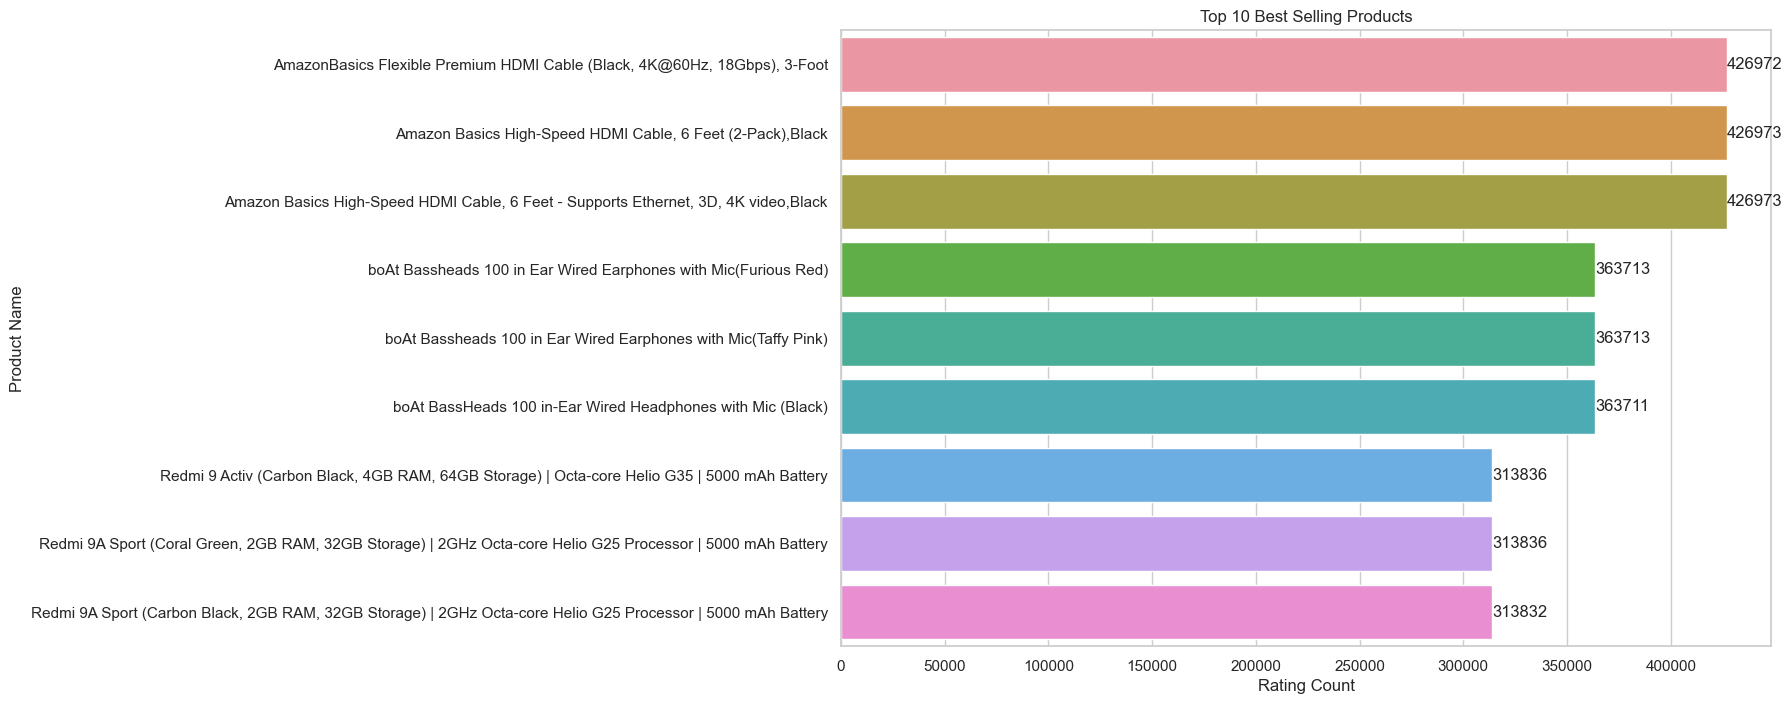

In [20]:
top_10_products = df.sort_values(by='rating_count', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_products, x='rating_count', y='product_name')
plt.title("Top 10 Best Selling Products")
plt.xlabel("Rating Count")
plt.ylabel("Product Name")

# Add label frequent at bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)
    
plt.show()

• The top-selling products are predominantly HDMI cables from AmazonBasics and earphones from boAt, indicating high demand for affordable and essential tech accessories.

• The Redmi smartphones also feature prominently, showcasing a strong market for budget-friendly smartphones with decent specifications.

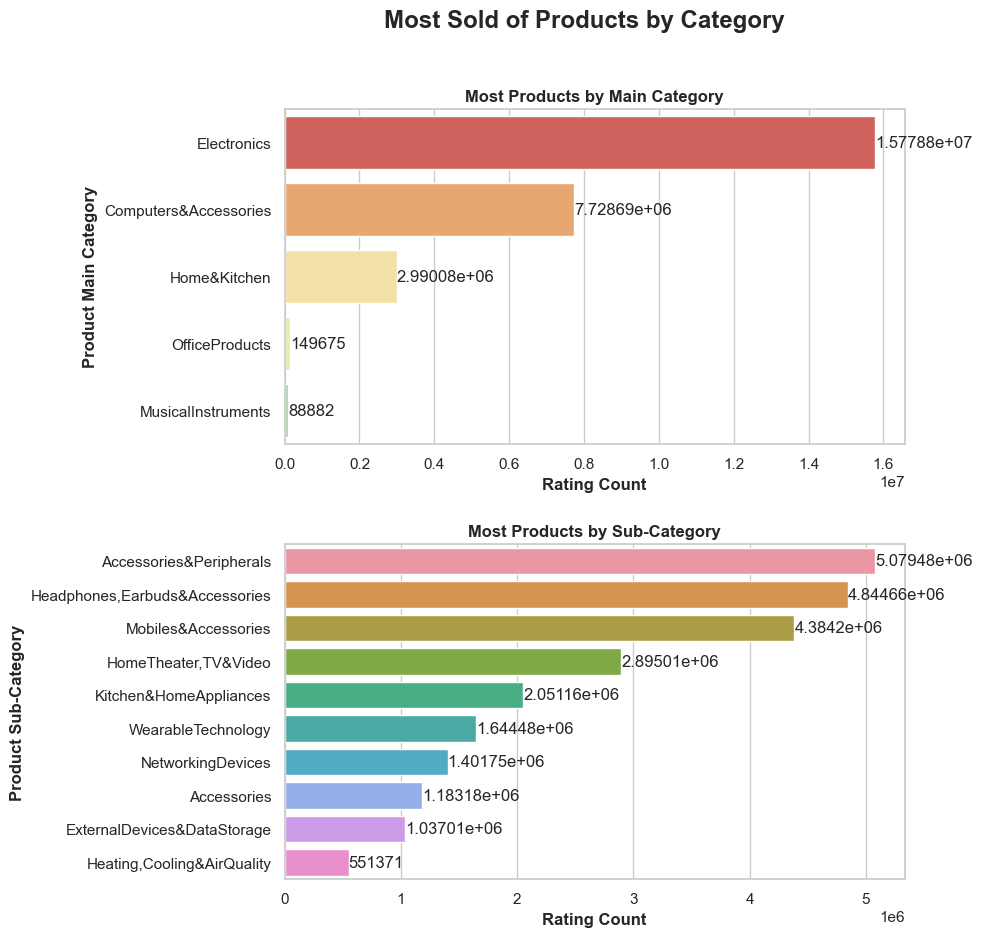

In [21]:
# Sum the products based on main product category
most_main_items = df.groupby('category_level_1')['rating_count'].sum().nlargest(5).reset_index(name='counts')

# Sum the products based on sub product category
most_sub_items = df.groupby('category_level_2')['rating_count'].sum().nlargest(10).reset_index(name='counts')

# Create subplot
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Most Sold of Products by Category', fontweight='heavy', size='x-large')

# Plot for main category
sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='category_level_1')
# Plot for Sub-Categogory
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='category_level_2')

# Adjust space on each subplot
plt.subplots_adjust(hspace=0.3)

# Adjust label and title for first subplot
ax[0].set_xlabel('Rating Count', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Most Products by Main Category', fontweight='bold')

# Adjust label and title for second subplot
ax[1].set_xlabel('Rating Count', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')
ax[1].set_title('Most Products by Sub-Category', fontweight='bold')

# Add label frequent at bar
ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

# Showing Plot
plt.show()


• **Electronics** dominate the main category, highlighting a strong consumer preference for electronic products.

• Within sub-categories, **Accessories & Peripherals**, and **Headphones, Earbuds & Accessories** are highly popular, indicating high consumer demand for these products.

• Categories related to daily use and technology (like Home & Kitchen, Mobiles & Accessories, and Wearable Technology) also show significant consumer interest.

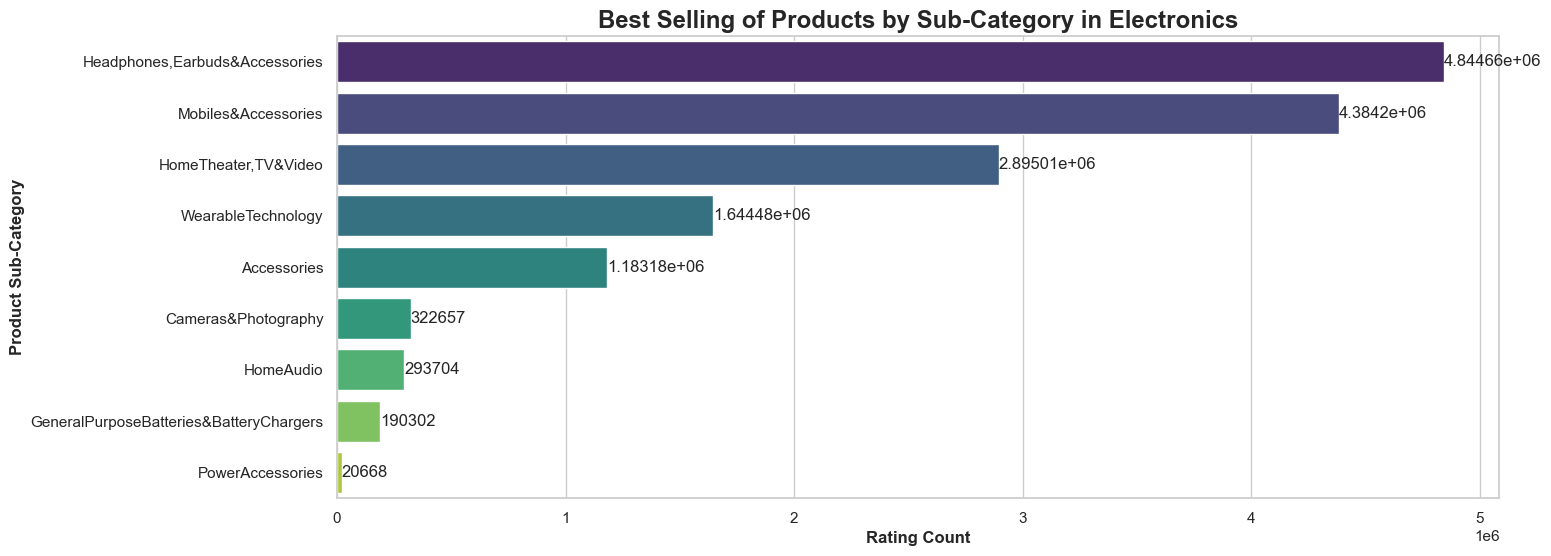

In [22]:
# "Electronics" of main category filter
electronics_df = df[df['category_level_1'] == 'Electronics']

# Total of each sub-category in "Electronics"
most_sub_items_electronics = electronics_df.groupby('category_level_2')['rating_count'].sum().reset_index()
most_sub_items_electronics = most_sub_items_electronics.rename(columns={'rating_count': 'counts'})
most_sub_items_electronics = most_sub_items_electronics.sort_values(by='counts', ascending=False)

# Create plot
plt.figure(figsize=(15, 6))
sns.barplot(data=most_sub_items_electronics, x='counts', y='category_level_2', palette='viridis')
plt.title('Best Selling of Products by Sub-Category in Electronics', fontweight='heavy', size='x-large')
plt.xlabel('Rating Count', fontweight='bold')
plt.ylabel('Product Sub-Category', fontweight='bold')

# Add label frequent at bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)

# Showing plot
plt.show()

• The most popular sub-categories within Electronics are **Headphones, Earbuds & Accessories**, and **Mobiles & Accessories**. These categories dominate in terms of rating counts, suggesting they are the most frequently purchased or reviewed.

• The high rating counts for **Wearable Technology** and **Home Theater, TV & Video** indicate growing trends in consumer electronics, focusing on personal devices and home entertainment.

• Sub-categories like **Power Accessories** and **General Purpose Batteries & Battery Chargers** have significantly lower rating counts, reflecting less consumer interest or market penetration.

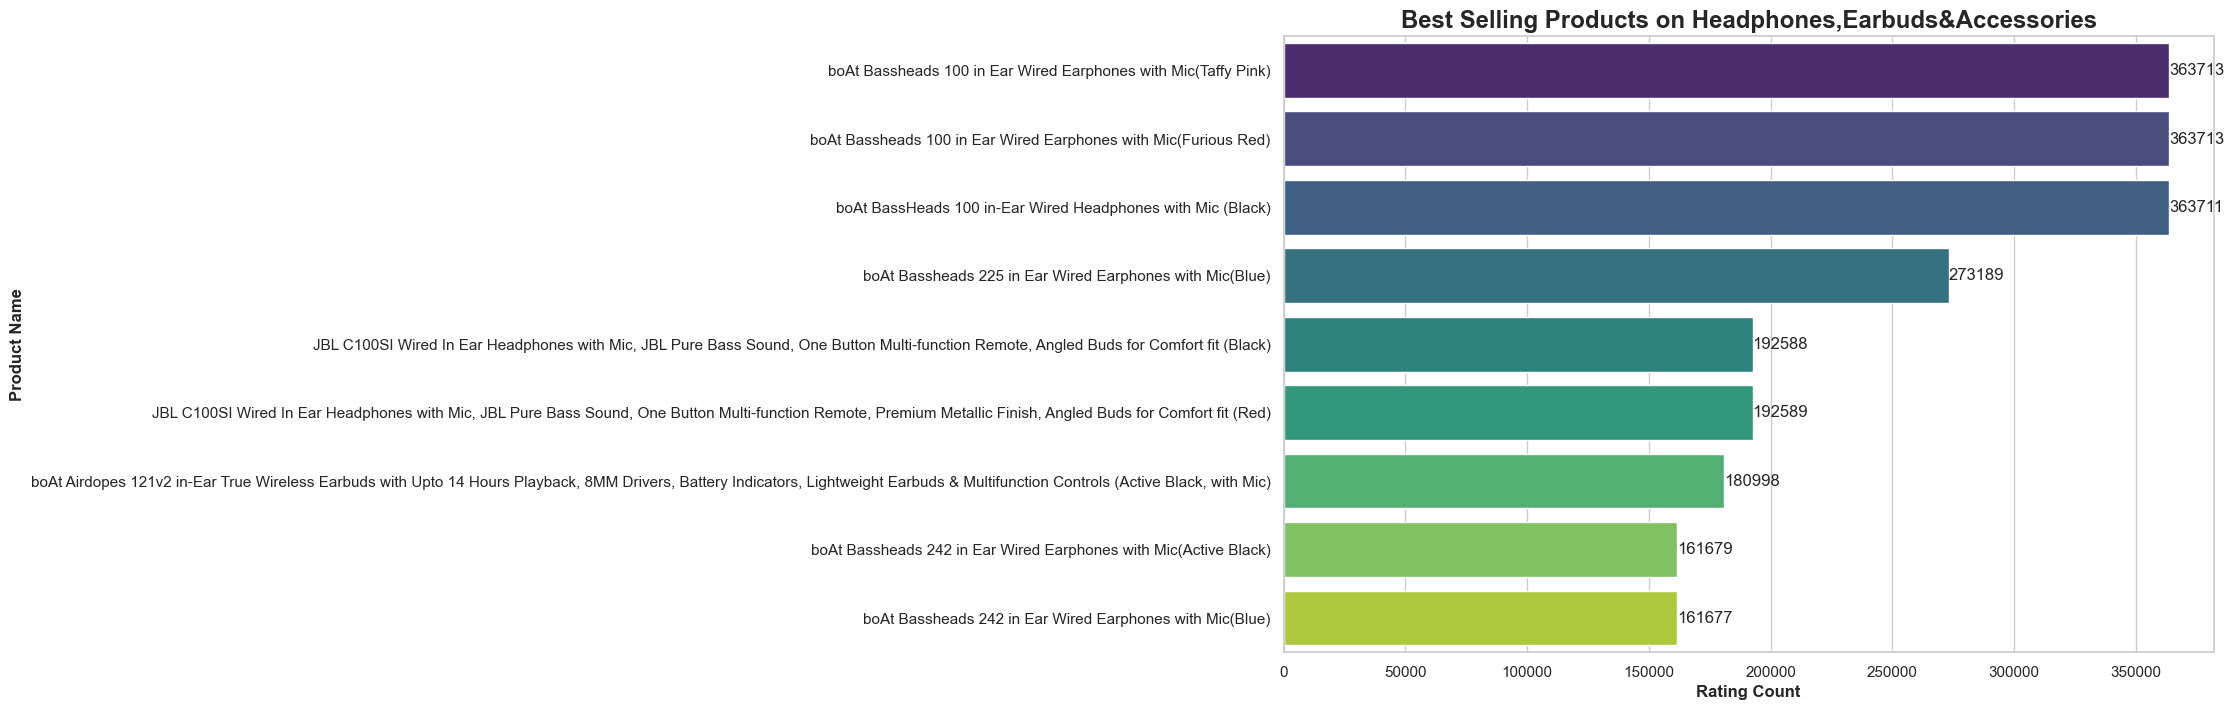

In [23]:
# "Headphones,Earbuds&Accessories" of sub-category filter
headphones_df = df[df['category_level_2'] == 'Headphones,Earbuds&Accessories']

top_10_products_headphones = headphones_df.sort_values(by='rating_count', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_products_headphones, x='rating_count', y='product_name', palette='viridis')
plt.title("Best Selling Products on Headphones,Earbuds&Accessories", fontweight='heavy', size='x-large')
plt.xlabel("Rating Count", fontweight='bold')
plt.ylabel("Product Name", fontweight='bold')

# Add label frequent at bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)
    
plt.show()

The top-selling products are predominantly earphones from boAt and ear headphones from JBL, indicating high demand for affordable and essential tech accessories.

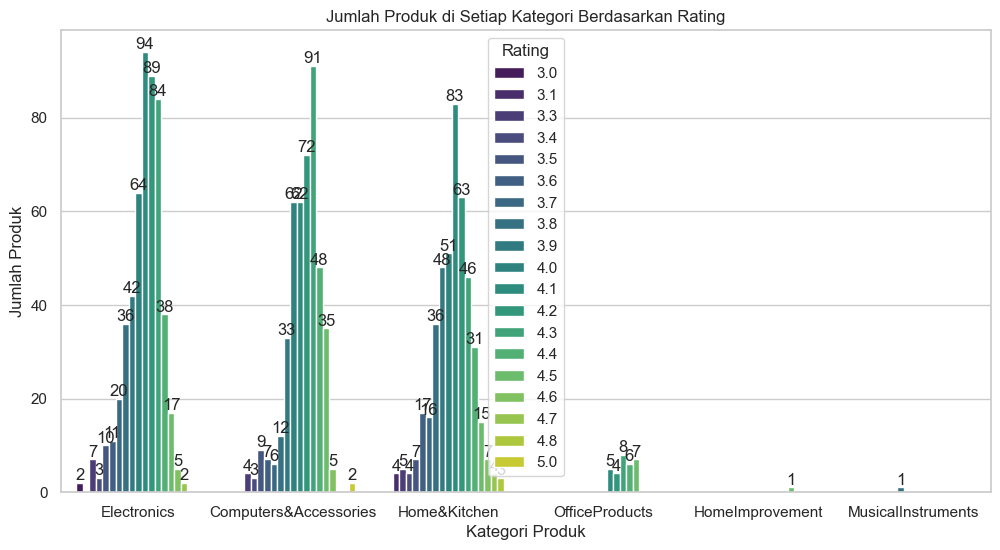

In [24]:
# frequent combinations of product categories and ratings, ordered by the number of occurrences
rating_counts = df.groupby(['category_level_1', 'rating']).size().sort_values(ascending=False).reset_index(name='count').head(55)

# Create a barchart
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_counts, x='category_level_1', y='count', hue='rating', palette='viridis')

plt.title('Jumlah Produk di Setiap Kategori Berdasarkan Rating')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Produk')
plt.legend(title='Rating')

# Add label frequent at bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)
    
plt.show()

From the bar plot above indicates that the **Computer & Accecories** and **Home & Kitchen** category have highly product with higher rating than **Home Improvement** and **Musical Instruments**.

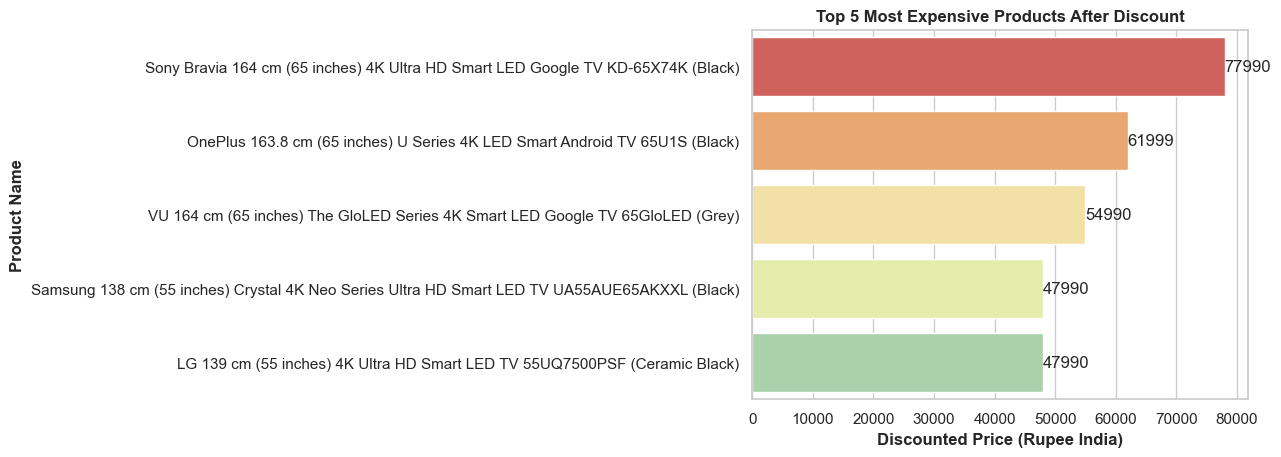

In [25]:
#Top 5 Most Expensive Products After Discount

disc_exp = sns.barplot(data=df.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')

disc_exp.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')

# Add label frequent at bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)
    
plt.show()

The most expensive products after discount are dominantly by Smart LED TV from Sony Bravia

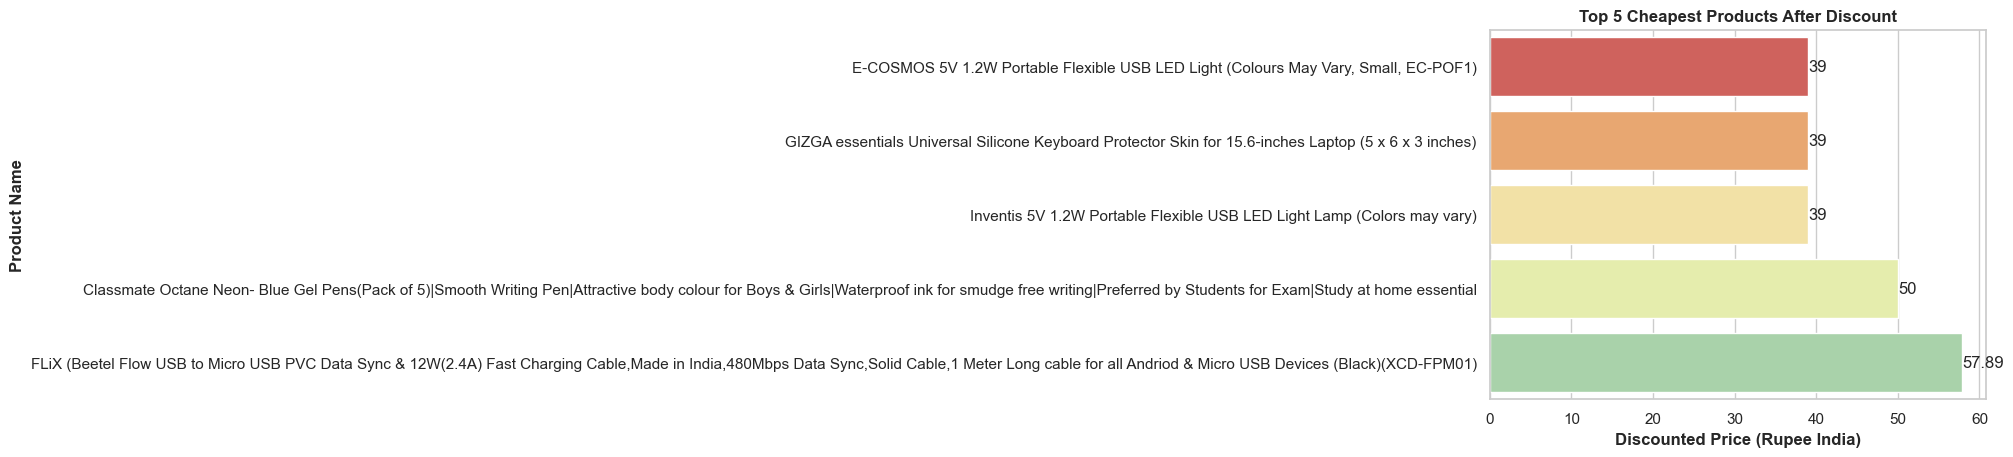

In [26]:
#Top 5 Cheapest Products After Discount

disc_cheap = sns.barplot(data=df.sort_values('discounted_price').head(5), x='discounted_price', y='product_name')

disc_cheap.set_title('Top 5 Cheapest Products After Discount', fontweight='bold')
disc_cheap.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

# Add label frequent at bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)
    
plt.show()

The cheapest products after discount are dominantly by USB LED light from E-COSMOS

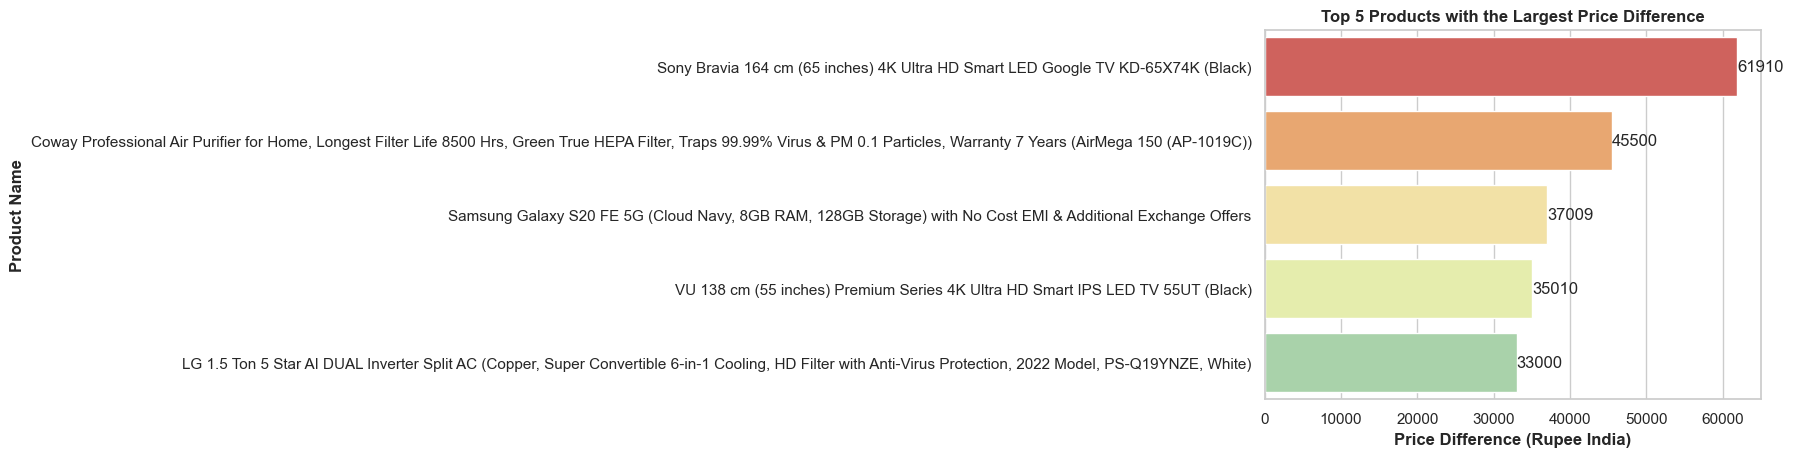

In [27]:
#Top 5 Products with the largest difference in price due to discount

dif_price_large = sns.barplot(data= df.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')

dif_price_large.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif_price_large.set_xlabel('Price Difference (Rupee India)', fontweight='bold')
dif_price_large.set_ylabel('Product Name', fontweight='bold')

# Add label frequent at bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.show()

The most product with largest price difference are dominantly bt LED TV from Sony Bravia

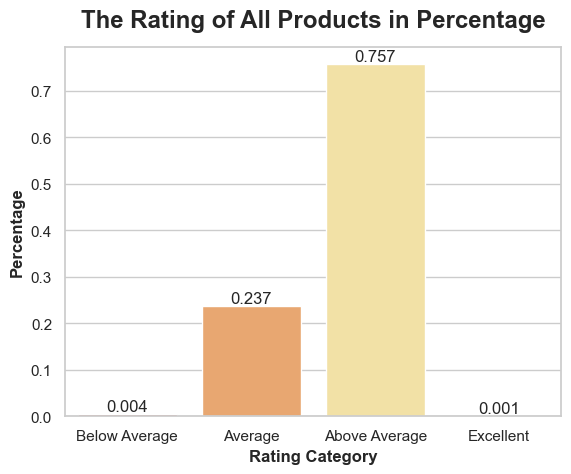

In [28]:
#The Rating of All Products in Percentage

rating_ordered = ['Below Average', 'Average', 'Above Average', 'Excellent']

rating_count = df['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')

rating_count['counts'] = rating_count['counts'].round(3)

rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)

rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Percentage', fontweight='bold')
rating_count_plot.set_title('The Rating of All Products in Percentage', fontweight='heavy', size='x-large', y=1.03)


rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

Most of the products in this dataset have been rated **Above Average**. There are extremely few products that are rated **Below Average** and **Excellent**. No products are rated as **Poor** in this dataset.

## Sentiment Analysis with VADER (Valence Aware Dictionary and sEntiment Reasoner) ##

In [29]:
#Running the polarity Score on the entire dataset
res = {}

for i, row in df.iterrows():
    review_desc =row['review_content']
    myid = row['product_id']
    res[myid] = sia.polarity_scores(review_desc)

In [30]:
pol_score = pd.DataFrame(res).T
pol_score = pol_score.reset_index().rename(columns={'index' : 'product_id'})

pol_score

,product_id,neg,neu,pos,compound
0,B07JW9H4J1,0.032,0.744,0.224,0.9033
1,B098NS6PVG,0.010,0.821,0.169,0.9853
2,B096MSW6CT,0.000,0.641,0.359,0.6808
3,B08HDJ86NZ,0.028,0.800,0.172,0.8316
4,B08CF3B7N1,0.116,0.719,0.165,0.9809
...,...,...,...,...,...
1343,B08L7J3T31,0.016,0.763,0.221,0.9468
1344,B01M6453MB,0.122,0.714,0.164,0.7876
1345,B009P2LIL4,0.083,0.718,0.199,0.9698
1346,B00J5DYCCA,0.061,0.882,0.057,-0.2960


In [31]:
#Merging the Dataframe with Polarity Score

df1 = df.merge(pol_score, how='left')

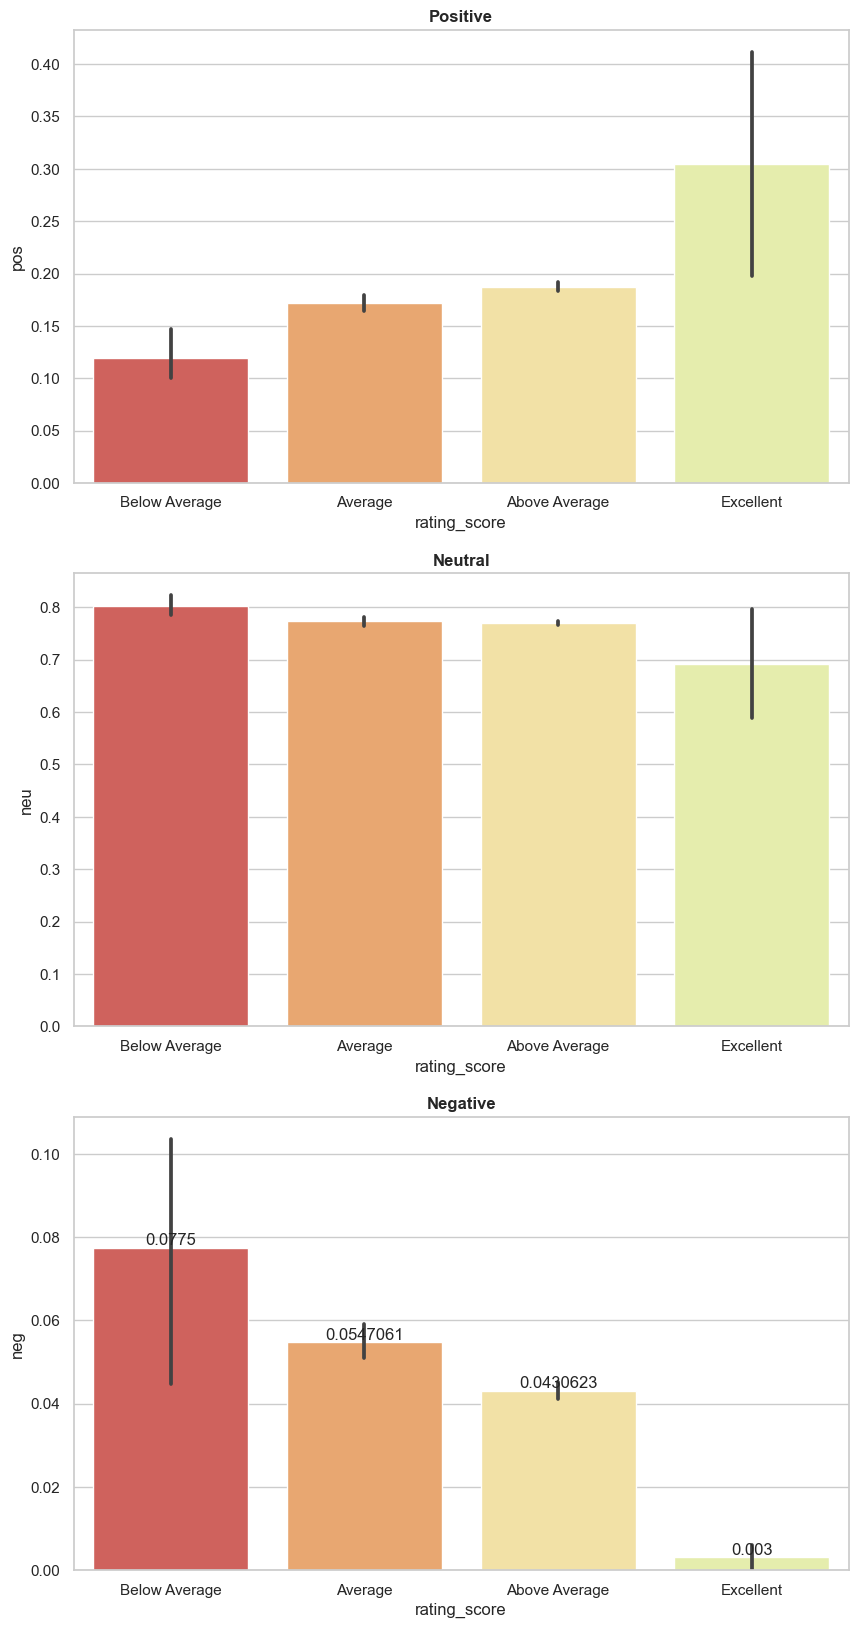

In [32]:
#Comparing Results of the Sentiment Analysis with the Rating 

fig, ax = plt.subplots(3,1, figsize=(10,20))

sns.barplot(data=df1, x='rating_score', y='pos', ax=ax[0])
sns.barplot(data=df1, x='rating_score', y='neu', ax=ax[1])
sns.barplot(data=df1, x='rating_score', y='neg', ax=ax[2])

ax[0].set_title('Positive', fontweight = 'bold')
ax[1].set_title('Neutral', fontweight = 'bold')
ax[2].set_title('Negative', fontweight = 'bold')

# Add label frequent at bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)
    
plt.show()

From the Sentiment Analysis, we can see that the amount of positive words being used in reviews as the rating goes up increases.

The amount of negative words being used in reviews as the rating goes up drastically decreases.

In [33]:
#Statistical Description on the Sentiment Score

sentiment_score = df1[['pos', 'neu', 'neg', 'compound']]
sentiment_score.describe()[1:7]

,pos,neu,neg,compound
mean,0.183567,0.770527,0.045912,0.820094
std,0.074179,0.071698,0.037710,0.368219
min,0.000000,0.465000,0.000000,-0.982100
25%,0.132000,0.727000,0.020000,0.870625
50%,0.174000,0.780000,0.041000,0.961500
75%,0.225000,0.819000,0.064000,0.988825


We can conclude that most of the reviews given by reviewers contains mostly positive reviews with an average compound score of 96%

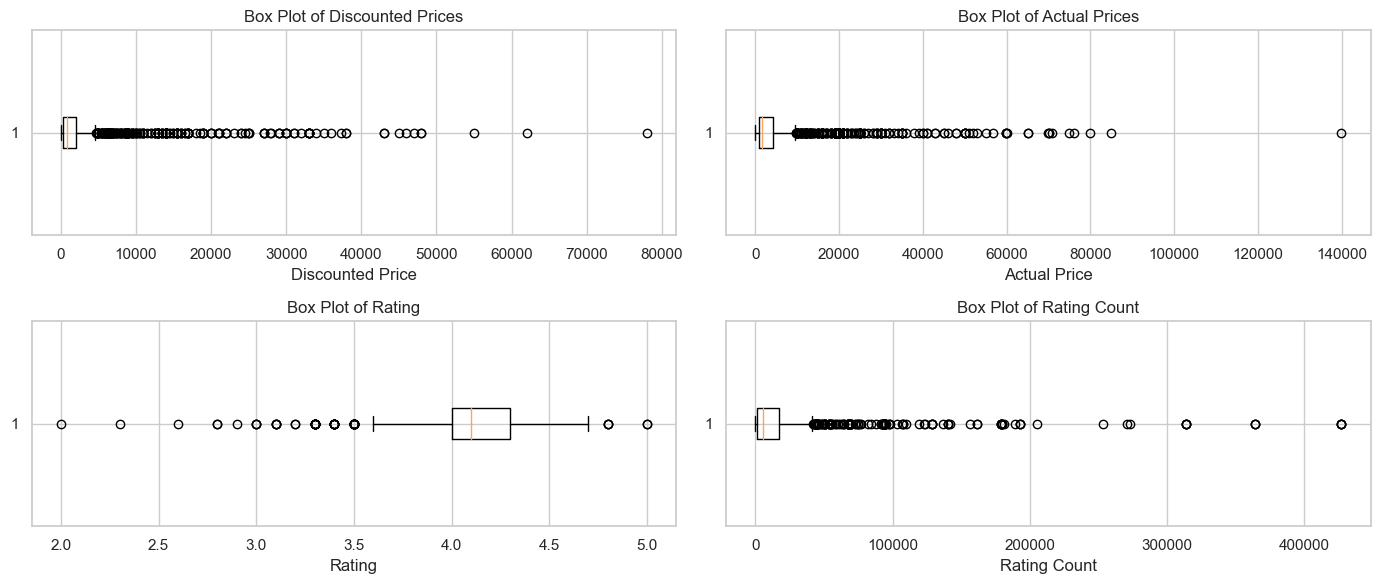

In [34]:
# Create box plots
plt.figure(figsize=(14, 6))

# Box plot for discounted prices
plt.subplot(2, 2, 1)
plt.boxplot(df['discounted_price'].dropna(), vert=False)
plt.title('Box Plot of Discounted Prices')
plt.xlabel('Discounted Price')

# Box plot for actual prices
plt.subplot(2, 2, 2)
plt.boxplot(df['actual_price'].dropna(), vert=False)
plt.title('Box Plot of Actual Prices')
plt.xlabel('Actual Price')

# Box plot for actual prices
plt.subplot(2, 2, 3)
plt.boxplot(df['rating'].dropna(), vert=False)
plt.title('Box Plot of Rating')
plt.xlabel('Rating')

# Box plot for actual prices
plt.subplot(2, 2, 4)
plt.boxplot(df['rating_count'].dropna(), vert=False)
plt.title('Box Plot of Rating Count')
plt.xlabel('Rating Count')

# Show the plots
plt.tight_layout()
plt.show()

In this method, we use IQR (Inter Quartile Range). IQR approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

In [35]:
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Create arrays of Boolean values indicating the outlier rows
    idx = df[(df[col] >= upper) | (df[col] <= lower)].index
    df.drop(idx , inplace=True)

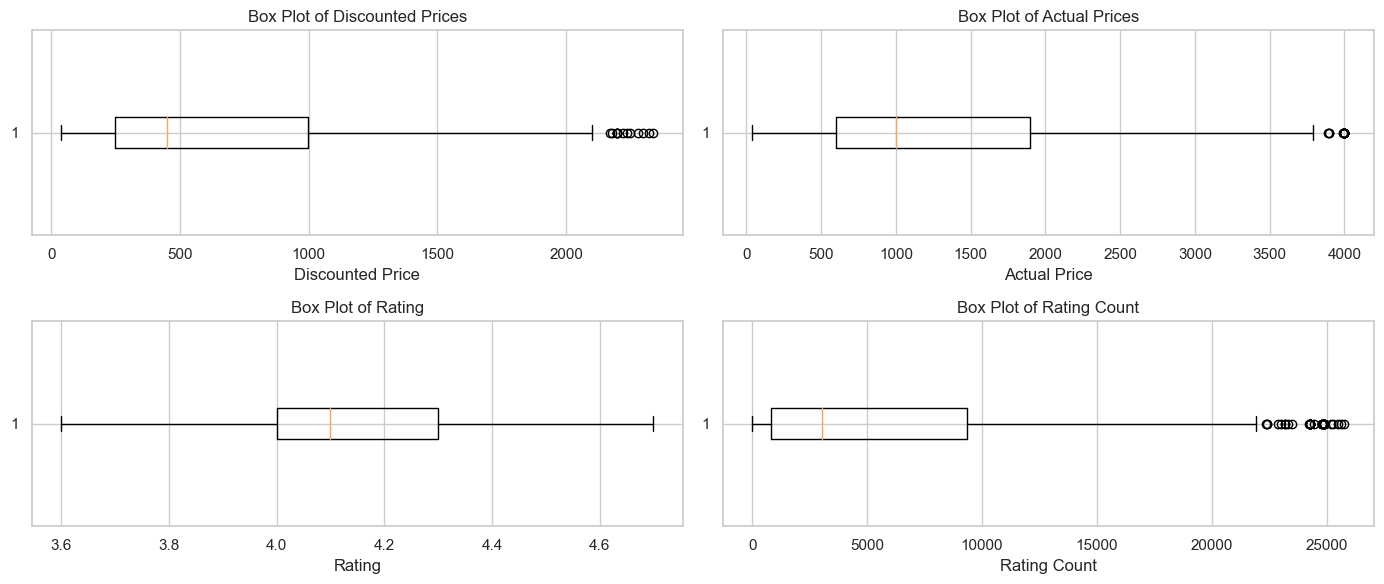

In [36]:
# first iteration
remove_outlier(df, 'discounted_price')
remove_outlier(df, 'actual_price')
remove_outlier(df, 'rating')
remove_outlier(df, 'rating_count')

# second iteration
remove_outlier(df, 'discounted_price')
remove_outlier(df, 'actual_price')
remove_outlier(df, 'rating')
remove_outlier(df, 'rating_count')

# Create box plots
plt.figure(figsize=(14, 6))

# Box plot for discounted prices
plt.subplot(2, 2, 1)
plt.boxplot(df['discounted_price'].dropna(), vert=False)
plt.title('Box Plot of Discounted Prices')
plt.xlabel('Discounted Price')

# Box plot for actual prices
plt.subplot(2, 2, 2)
plt.boxplot(df['actual_price'].dropna(), vert=False)
plt.title('Box Plot of Actual Prices')
plt.xlabel('Actual Price')

# Box plot for actual prices
plt.subplot(2, 2, 3)
plt.boxplot(df['rating'].dropna(), vert=False)
plt.title('Box Plot of Rating')
plt.xlabel('Rating')

# Box plot for actual prices
plt.subplot(2, 2, 4)
plt.boxplot(df['rating_count'].dropna(), vert=False)
plt.title('Box Plot of Rating Count')
plt.xlabel('Rating Count')

# Show the plots
plt.tight_layout()
plt.show()

## System Recommendation with SVD ##

**SVD**

In [37]:
from surprise import Dataset, Reader, SVD, KNNBasic, accuracy
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate

In [38]:
# create reader and surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

# Split data
trainset, testset = train_test_split(data, test_size=0.25)

In [39]:
# Define parameters of SVD
svd_params = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.2]
}

# Insialize GridSearchCV for SVD
gs = GridSearchCV(SVD, svd_params, measures=['rmse'], cv=2)

# train GridSearchCV SVD
gs.fit(data)

# Showing the best parameters for SVD
print("Best parameters found for SVD: ", gs.best_params['rmse'])

# Insialize SVD model with best parameters
best_svd = gs.best_estimator['rmse']

# Train the model SVD with the best parameters
best_svd.fit(trainset)

# Create prediction SVD on test set
predictions_svd = best_svd.test(testset)

# Take accuracy of SVD
svd_rmse = accuracy.rmse(predictions_svd)
print("RMSE SVD: ", accuracy.rmse(predictions_svd))

Best parameters found for SVD:  {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.02}
RMSE: 0.2120
RMSE: 0.2120
RMSE SVD:  0.21197344538950813


In [40]:
from collections import defaultdict

# Function to get top-k predictions for each user
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Function to calculate precision@k and recall@k
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    
    precisions = dict()
    recalls = dict()
    
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    return precisions, recalls

# Function to calculate hit rate
def hit_rate(top_n, testset):
    hits = 0
    total = 0
    for uid, iid, true_r in testset:
        hit = any(iid == iid_pred for iid_pred, _ in top_n[uid])
        if hit:
            hits += 1
        total += 1
    return hits / total

# Function to calculate DCG@k and NDCG@k
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        return np.sum(r / np.log2(np.arange(2, r.size + 2)))
    return 0.

def ndcg_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    
    ndcgs = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        r = [(true_r >= threshold) for (_, true_r) in user_ratings]
        dcg_max = dcg_at_k(sorted(r, reverse=True), k)
        if not dcg_max:
            ndcgs[uid] = 0.
        else:
            ndcgs[uid] = dcg_at_k(r, k) / dcg_max
    return ndcgs

In [41]:
# Cross-validation results for better generalization performance
cv_results_svd = cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print cross-validation results
print("Cross-validation results for SVD: ", cv_results_svd)

# Calculate and display additional evaluation metrics
def calculate_metrics(predictions):
    mse = accuracy.mse(predictions)
    mae = accuracy.mae(predictions)
    return mse, mae

# Training metrics
train_predictions_svd = best_svd.test(trainset.build_testset())

train_mse_svd, train_mae_svd = calculate_metrics(train_predictions_svd)

# Testing metrics
test_mse_svd, test_mae_svd = calculate_metrics(predictions_svd)

# Error differences
error_diff_mse_svd = test_mse_svd - train_mse_svd

# Ratios
ratio_mse_mae_svd = test_mse_svd / test_mae_svd

# Display results
print(f"SVD - Training MSE: {train_mse_svd}, Testing MSE: {test_mse_svd}, Error Difference MSE: {error_diff_mse_svd}")
print(f"SVD - Testing MAE: {test_mae_svd}, Ratio MSE/MAE: {ratio_mse_mae_svd}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2271  0.2201  0.2377  0.2368  0.2021  0.2248  0.0131  
MAE (testset)     0.1731  0.1631  0.1900  0.1798  0.1574  0.1727  0.0116  
Fit time          0.14    0.10    0.28    0.09    0.09    0.14    0.07    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Cross-validation results for SVD:  {'test_rmse': array([0.22713039, 0.22008073, 0.23772998, 0.2367605 , 0.20213665]), 'test_mae': array([0.17305039, 0.16306698, 0.1899967 , 0.17976921, 0.15744491]), 'fit_time': (0.13752484321594238, 0.10118985176086426, 0.2791898250579834, 0.09332895278930664, 0.09027886390686035), 'test_time': (0.0010631084442138672, 0.0010371208190917969, 0.001046895980834961, 0.0013461112976074219, 0.0010280609130859375)}
MSE: 0.0119
MAE:  0.0699
MSE: 0.0449
MAE:  0.1646
SVD - Training MSE: 0.011935703287513425, Testing MSE: 0.044932741550298784

**SVD Model:**

RMSE (Root Mean Squared Error) on test set: Mean = 0.2241, Std = 0.0096

MAE (Mean Absolute Error) on test set: Mean = 0.1728, Std = 0.0069

Training MSE: 0.0112

Testing MSE: 0.0515

Error Difference (Training vs. Testing MSE): 0.0402

Testing MAE: 0.1721

Ratio MSE/MAE: 0.2989

• RMSE measures the average difference between the predicted and actual values. Lower values indicate better predictive accuracy.

• MAE measures the average absolute difference between the predicted and actual values. Lower values indicate better predictive accuracy.

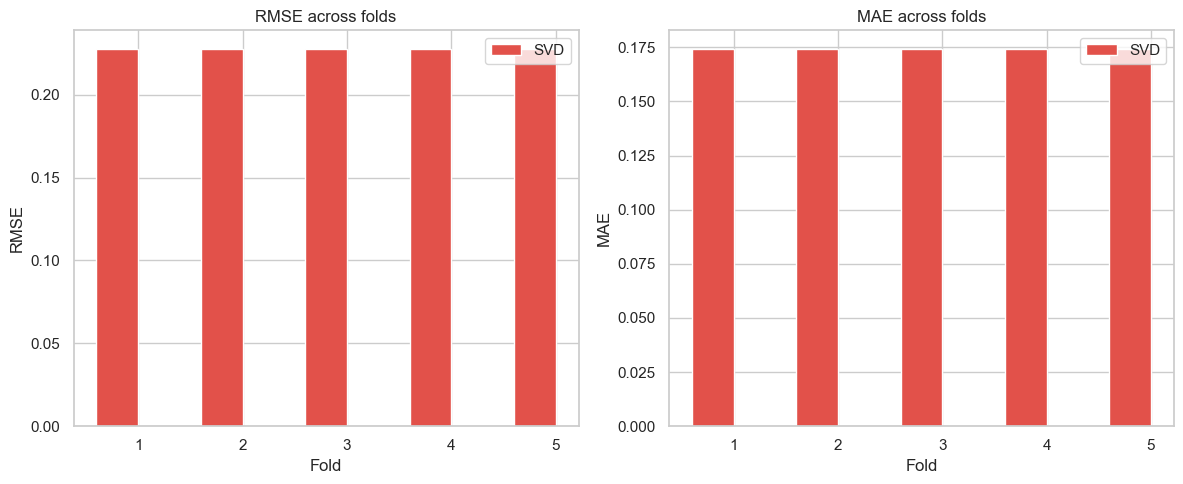

In [60]:
# Plotting RMSE across folds
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(np.arange(1, 6) - 0.2, svd_rmse, width=0.4, label='SVD')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE across folds')
plt.legend()

# Plotting MAE across folds
plt.subplot(1, 2, 2)
plt.bar(np.arange(1, 6) - 0.2, test_mae_svd, width=0.4, label='SVD')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.title('MAE across folds')
plt.legend()

plt.tight_layout()
plt.show()

• SVD models show consistency in their performance across different folds, indicating that their predictive accuracy is reliable and does not vary significantly with different training and testing splits.

• SVD models are highly accurate, given the low RMSE and MAE values. The differences in their performance are minimal, suggesting that SVD models are well-tuned and suitable for the task.

• The standard deviations for SVD at RMSE and MAE across folds are small, reinforcing the stability and robustness of both models.

• The consistent performance across folds indicates that both models generalize well to new data and are reliable for making predictions.

In [41]:
# Calculate top-n Predictions
top_n_svd = get_top_n(predictions_svd, n=10)

# Calculate precision and recall at k
precisions_svd, recalls_svd = precision_recall_at_k(predictions_svd, k=10, threshold=3.5)

# Calculate average precision and mean average precision
average_precisions_svd = [p for p in precisions_svd.values()]
mean_average_precision_svd = np.mean(average_precisions_svd)

# Calculate hit rate
hr_svd = hit_rate(top_n_svd, testset)

# Calculate ndcg at k
ndcgs_svd = ndcg_at_k(predictions_svd, k=10, threshold=3.5)

In [43]:
# Display evaluation results at SVD
print(f"Precision@10@SVD: {np.mean(list(precisions_svd.values()))}")
print(f"Recall@10@SVD: {np.mean(list(recalls_svd.values()))}")
print(f"Mean Average Precision SVD: {mean_average_precision_svd}")
print(f"Hit Rate SVD: {hr_svd}")
print(f"NDCG@10@SVD: {np.mean(list(ndcgs_svd.values()))}")

Precision@10@SVD: 1.0
Recall@10@SVD: 1.0
Mean Average Precision SVD: 1.0
Hit Rate SVD: 1.0
NDCG@10@SVD: 1.0


• Precision@10 indicates that all top 10 recommendations are relevant.

• Recall@10 indicates that the model successfully finds all relevant items within the top 10 recommendations.

• Mean Average Precision at 1.0 means the model consistently provides highly relevant recommendations across all users.

• Hit Rate shows that the model always finds relevant items in the recommendations.

• NDCG@10 (Normalized Discounted Cumulative Gain) at 1.0 means the model provides recommendations in the optimal order of relevance.

In [45]:
# Shows some predicted result
for pred in predictions_svd[:10]:  # Shows 10 first predicts pertama 
    print(f"User: {pred.uid}, Item: {pred.iid}, Actual Rating: {pred.r_ui}, Predicted Rating: {pred.est}")

User: AHFENRYJG4LPXDTUGEMG335VICSQ,AGSV37DJ5QTUYOXFJNPD4W7GXVFA,AGDEVIAYABTMIJLTYWTUS5M5VBTA,AFKDGUQ5TMGT3PXBDHAWPRE5CACQ,AHWENSYYF2QDH3EX4REMVGBEMMLQ,AGJOGZAGBMX7PBCUAILD2YIM5MAA,AF5EHUH4GWB7JZ3PZ53Z2DOYK5WQ,AHHT4VWMFYSASNW6RH2Q65C6YNDA, Item: B0BMXMLSMM, Actual Rating: 4.5, Predicted Rating: 4.414197863880268
User: AG4UNVU75Q7SYSAHMQ7XNPAM4Y2A,AES2BOVWXLI3RTOPQEKH3GCKANDQ,AHJ2PBZMYKYL5ZIS3RYNY5RQF5OA,AF3O4UMEWVEAG2555RB7QRZJ3V3Q,AEGSHUH24XRRJI6CKUBKUFVWIQCQ,AH7CBBXDYLF6D4NECP6UOHAD3DJQ,AGKUMIAJEBVE47SWGKSTRQIXQXCQ,AFSKSM4D23GMJJPYXOHYTH25FQQA, Item: B08DCVRW98, Actual Rating: 4.0, Predicted Rating: 4.1207336523126
User: AEULM3CY4ND6RQZI7TE64I2BNOWQ,AHT3QSBKTAPMXMMZHQYBKPCCXXLA,AFNWEVF5JQ7ENJHBHIHTBYUZBXYQ,AGQNWKU6Y4KUJ5VINPKC7UGSMCFQ,AEPVIJMCNS4OBHRA6D5ZXYVNTXZA,AGE7NMAHUEHPYGY7HXDJVHUFMMCQ,AFW6KM45ORMBEVYBQ4QMSGG2ODOQ,AFWFPCA372BJOQZ4WQNB54ZB2SKQ, Item: B00P93X6EK, Actual Rating: 4.5, Predicted Rating: 4.1207336523126
User: AH7ZFZAWQV5VTWQHLXZYDGFDNJGQ,AHFM667GXYFTR3AUJA3PYCTQNTRQ,A

In [56]:
def get_top_n_recommendations_svd(user_id, n):
    # Get all unrated items
    user_ratings = df[df['user_id'] == user_id]
    unrated_items = df[~df['product_id'].isin(user_ratings['product_id'])]['product_id'].unique()
    
    # Make predict to these unrated items
    predictions = [best_svd.predict(user_id, item_id) for item_id in unrated_items]
    
    # Sorts predictions based on predicted rating 
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)
    
    # Takes the top n items
    top_n_recommendations = recommendations[:n]
    
    # Displays results
    for rec in top_n_recommendations:
        print(f"Product ID: {rec.iid}, Predicted Rating: {rec.est}")

# Example of using the recommendation function using the SVD model
get_top_n_recommendations_svd(user_id='AHMY5CWJMMK5BJRBBSNLYT3ONILA', n=5)


Product ID: B0BP89YBC1, Predicted Rating: 4.249152181328461
Product ID: B0B694PXQJ, Predicted Rating: 4.233126405811968
Product ID: B0B8CHJLWJ, Predicted Rating: 4.2202071819068
Product ID: B0B86CDHL1, Predicted Rating: 4.219115342911296
Product ID: B00NFD0ETQ, Predicted Rating: 4.210175660064506


## Predicting Discounted Price of Products with Linear Regression ## 

In this section the predicting discounted price of products will use Simple Linear Regression Model. The Independent Varaible will be the **Actual Price** and the Dependent Variable will be **Discounted Price**.

In [60]:
# Extracting Independent and Dependent Variables

X = df['actual_price'].values.reshape(-1, 1)
y = df['discounted_price'].values.reshape(-1, 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [62]:
#Fitting Simple Linear Regression to the Training Set

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [63]:
#Calculating the Coefficients
print('Coefficients Score: ', reg.coef_)

#Calculating the Intercept
print('Intercept Score: ', reg.intercept_)

Coefficients Score:  [[0.51056869]]
Intercept Score:  [-18.51390055]


The coefficient indicates that for each unit increase in the independent variable (e.g., Actual Price), the dependent variable (e.g., Discounted Price) increases by 0.51056869 units, controlling for other variables. The intercept is the predicted value when all independent variables are zero.

In [64]:
#Calculating the R Squared Value

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred = reg.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))

R2 Score:  0.6823042627251845


An R² Score of 0.6823 means the model explains about 68.23% of the variability in the data. This indicates moderate predictive power. 

In [65]:
# Training error
y_train_pred = reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Testing error
y_test_pred = reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')

# Calculation of error difference
error_difference = test_mse - train_mse
print(f'Error Difference: {error_difference}')


Training MSE: 76553.14508924575
Testing MSE: 84136.79467038531
Error Difference: 7583.649581139558


The small difference between Training and Testing MSE indicates that the model does not significantly overfit.

In [66]:
mse_lin = mean_squared_error(y_test, y_pred)
mae_lin = mean_absolute_error(y_test, y_pred)

print('Testing MSE Score: ', mse_lin)
print('Testing MAE Score: ', mae_lin)

ratio = mse_lin / mae_lin
print(f"Ratio MSE/MAE: {ratio}")

Testing MSE Score:  84136.79467038531
Testing MAE Score:  212.33233704235568
Ratio MSE/MAE: 396.2504997700932


An MAE of 212.33 shows the average absolute prediction error in the original units of the data, which is acceptable depending on the context.

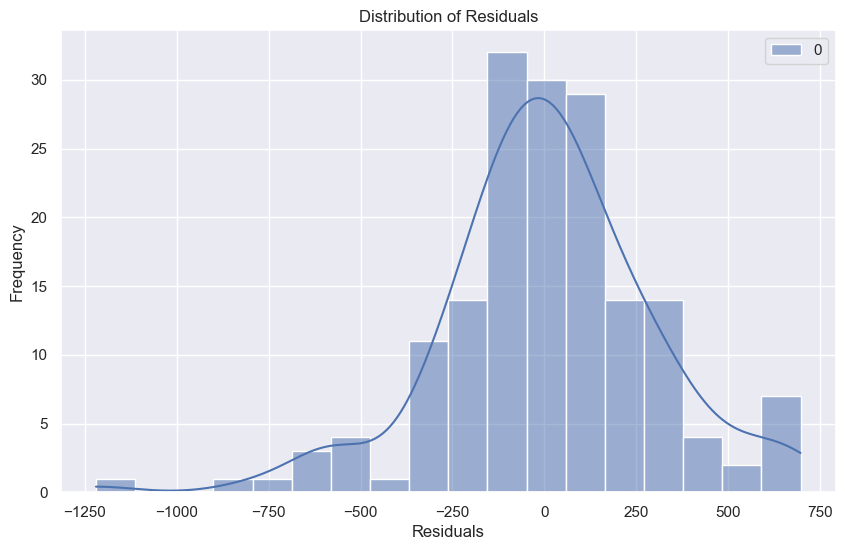

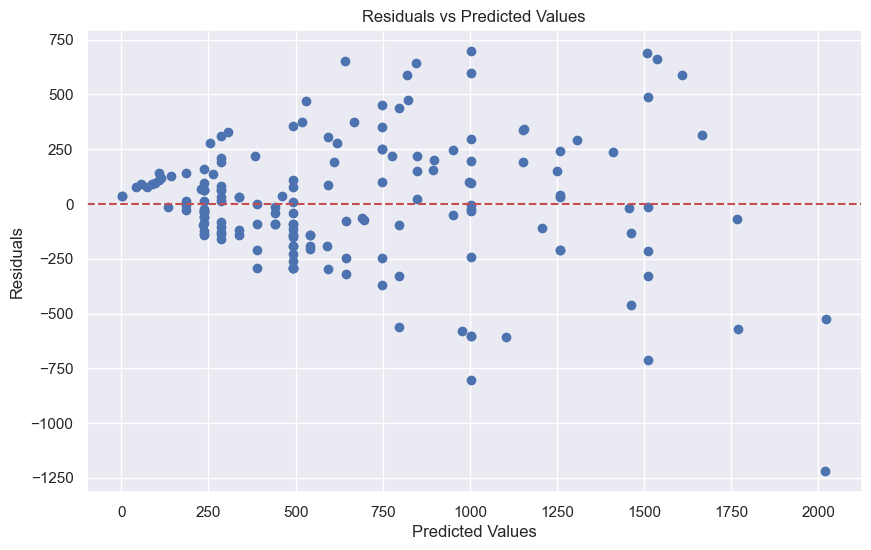

In [67]:
residuals = y_test - y_pred

# Plot histogram residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Scatter plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

• The residuals are centered around zero but show long tails, indicating some large errors.

• The plot of Residuals vs. Predicted indicates heteroscedasticity, meaning the variability of the residuals is not constant.

In [68]:
#Cross Validation Result

from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=21)

cv_results = cross_val_score(reg, X, y, cv=kf)

print('Cross Validation Results Mean: ', cv_results.mean())

Cross Validation Results Mean:  0.7275750340767825


The cross-validation mean score being higher (0.7276) suggests that the model performs consistently across different subsets of the data.

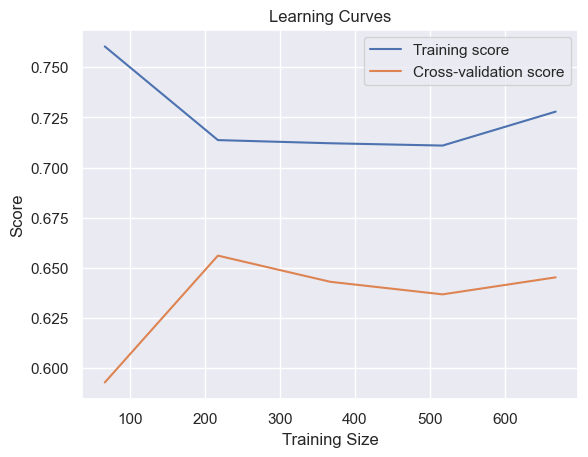

In [69]:
from sklearn.model_selection import learning_curve

# Visualize learning curves
train_sizes, train_scores, test_scores = learning_curve(reg, X, y, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curves')
plt.show()

The learning curves show that the training score stabilizes after a certain amount of training data, but the validation score levels off around a lower value, indicating potential underfitting.

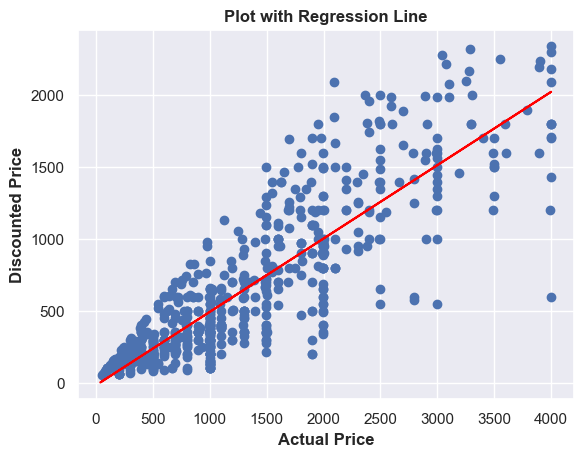

In [70]:
# Scatter Plot with Regression Line

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Actual Price', fontweight='bold')
plt.ylabel('Discounted Price', fontweight='bold')
plt.title('Plot with Regression Line', fontweight='bold')
plt.show()

Most of the data points fall around the regression line, but there are some outliers that may affect the model.

In [81]:
def predict_discounted_price(actual_price):
    actual_price_reshaped = np.array(actual_price).reshape(-1, 1)
    predicted_discounted_price = reg.predict(actual_price_reshaped)
    return predicted_discounted_price[0][0]

actual_price_example = 999 
predicted_price = predict_discounted_price(actual_price_example)
print(f'Predicted Discounted Price for Actual Price {actual_price_example}: {predicted_price}')

Predicted Discounted Price for Actual Price 999: 491.5442254565237


Overall, the model demonstrates moderate predictive power and reasonable consistency between training and testing performance, suggesting it can generalize to new data reasonably well. However, signs of heteroscedasticity and high MSE/MAE ratio indicate the presence of large errors that need to be addressed.